<a href="https://colab.research.google.com/github/WhiteBeyond/AI/blob/main/ClassMember.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten,  LeakyReLU
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
%cd /content/drive/MyDrive/MidTerm/ClassMember

/content/drive/MyDrive/MidTerm/ClassMember


In [11]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [12]:
# Tạo bộ dữ liệu training set
training_set=train.flow_from_directory('/content/drive/MyDrive/MidTerm/ClassMember/Train',target_size=(30, 40), batch_size=32, class_mode='categorical')

Found 1440 images belonging to 24 classes.


In [13]:
training_set.class_indices

{'Anh Kiet': 0,
 'Bao Thai': 1,
 'Bui Dang Khoa': 2,
 'Hau': 3,
 'Hoai Phong': 4,
 'Hoang Thanh': 5,
 'Hong Phuc': 6,
 'Huu Long': 7,
 'Minh Tien': 8,
 'Ngoc Hieu': 9,
 'Ngoc Minh': 10,
 'Ngoc Sang': 11,
 'Ngoc Thach': 12,
 'Nguyen Bui Anh Kiet': 13,
 'Nguyen Hoang': 14,
 'Nguyen Tuan Kiet': 15,
 'Pham Quang Huy': 16,
 'Phuc Dung': 17,
 'Quang Huy': 18,
 'Quang Phuc': 19,
 'Son Tung': 20,
 'Tan Dat': 21,
 'Tan Phat': 22,
 'Viet Ha': 23}

In [17]:
# Tạo ra mạng CNN để train mô hình

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='linear', kernel_initializer='he_uniform', padding='same', input_shape=(30, 40, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear', kernel_initializer='he_uniform', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear', kernel_initializer='he_uniform', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(256, (3, 3), activation='linear', kernel_initializer='he_uniform', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())  # modify input_shape 
model.add(Dense(512, activation='linear', kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))
model.add(Dense(256, activation='linear', kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))
model.add(Dense(24, activation='softmax'))

# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                  

In [18]:
history = model.fit(training_set, epochs=50, batch_size=128, verbose=1)

Epoch 1/50
45/45 [==============================] - 211s 5s/step - loss: 2.7791 - accuracy: 0.2382
Epoch 2/50
45/45 [==============================] - 10s 209ms/step - loss: 0.7884 - accuracy: 0.7743
Epoch 3/50
45/45 [==============================] - 11s 231ms/step - loss: 0.3326 - accuracy: 0.9035
Epoch 4/50
45/45 [==============================] - 11s 254ms/step - loss: 0.1677 - accuracy: 0.9493
Epoch 5/50
45/45 [==============================] - 10s 221ms/step - loss: 0.1276 - accuracy: 0.9597
Epoch 6/50
45/45 [==============================] - 11s 235ms/step - loss: 0.1820 - accuracy: 0.9465
Epoch 7/50
45/45 [==============================] - 12s 253ms/step - loss: 0.1310 - accuracy: 0.9660
Epoch 8/50
45/45 [==============================] - 11s 248ms/step - loss: 0.0556 - accuracy: 0.9840
Epoch 9/50
45/45 [==============================] - 11s 254ms/step - loss: 0.0668 - accuracy: 0.9819
Epoch 10/50
45/45 [==============================] - 12s 254ms/step - loss: 0.0589 - accuracy

In [19]:
model.save('/content/drive/MyDrive/MidTerm/ClassMember/CM_model.h5')

In [20]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.028583945706486702
Train Accuracy 0.9888888597488403


<function matplotlib.pyplot.show(close=None, block=None)>

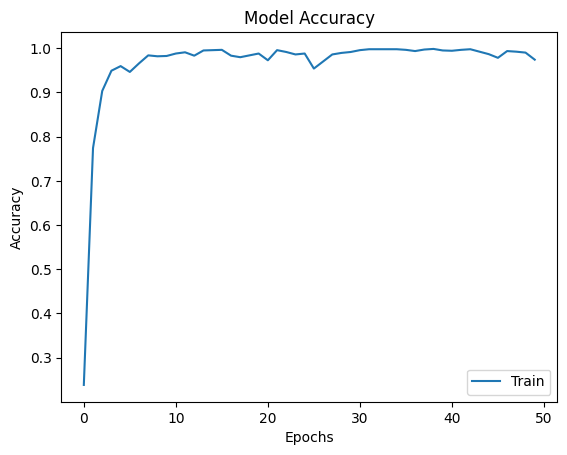

In [21]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'])
plt.show

In [22]:
model1= load_model('/content/drive/MyDrive/MidTerm/ClassMember/CM_model.h5')

1/1 [==============================] - 0s 24ms/step
Viet Ha


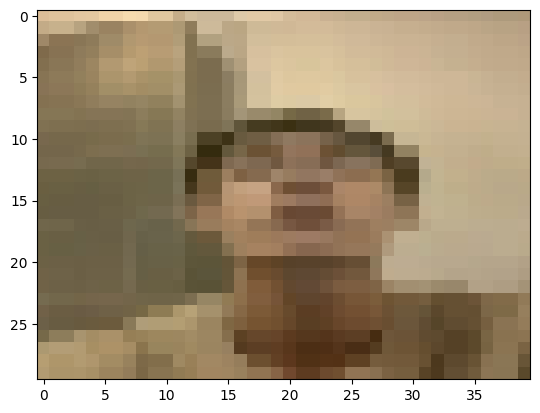

1/1 [==============================] - 0s 25ms/step
Phuc Dung


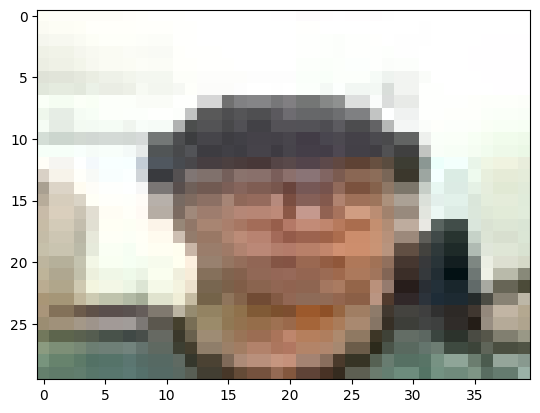

1/1 [==============================] - 0s 27ms/step
Phuc Dung


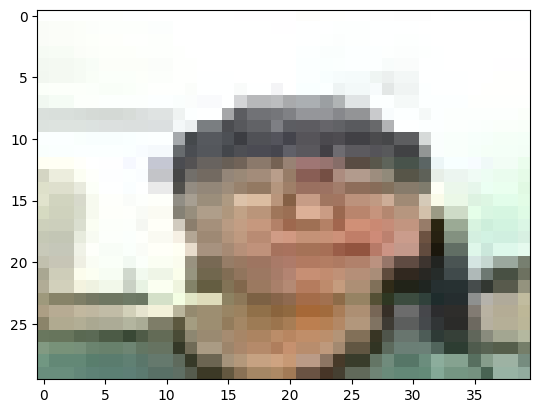

1/1 [==============================] - 0s 29ms/step
Hau


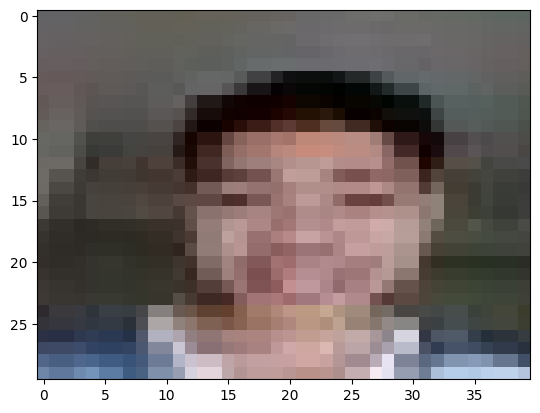

1/1 [==============================] - 0s 35ms/step
Hoang Thanh


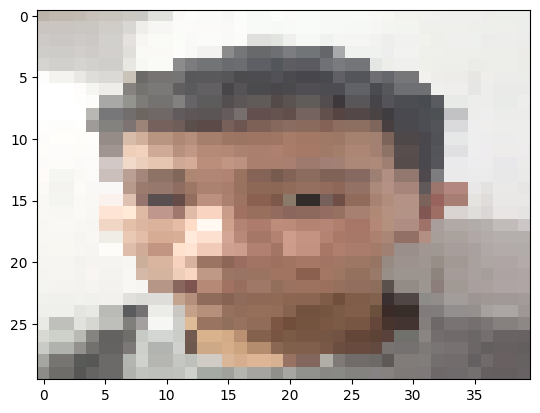

1/1 [==============================] - 0s 48ms/step
Nguyen Hoang


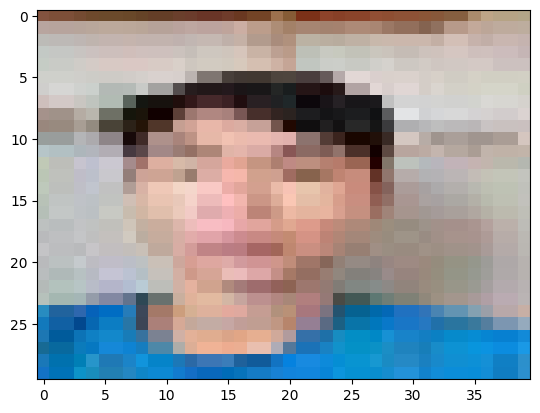

In [24]:
Test="/content/drive/MyDrive/MidTerm/ClassMember/Test"

for i in os.listdir(Test):
  img=load_img(Test+'/'+i,target_size=(30,40))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model1.predict(img).argmax())
  class_name=['Anh Kiet','Bao Thai','Bui Dang Khoa','Hau','Hoai Phong', 'Hoang Thanh', 'Hong Phuc', 'Huu Long', 'Minh Tien',
              'Ngoc Hieu', 'Ngoc Minh', 'Ngoc Sang', 'Ngoc Thach','Nguyen Bui Anh Kiet', 'Nguyen Hoang', 'Nguyen Tuan Kiet', 
              'Pham Quang Huy','Phuc Dung', 'Quang Huy', 'Quang Phuc', 'Son Tung', 'Tan Dat', 'Tan Phat', 'Viet Ha']
  print(class_name[result])
  plt.show()

